In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from sainomore.data import cyclic
from sainomore.xai import ElissabethWatcher, get_alphabet_projection
from torchvision.datasets import MNIST
import torchvision

In [23]:
train = MNIST(
    "data",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]),
)
test = MNIST(
    "data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]),
)

In [28]:
from torch.utils.data import DataLoader
loader = DataLoader(test)

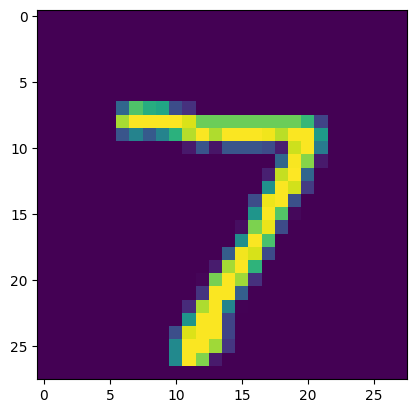

In [29]:
plt.imshow(next(iter(loader))[0][0,0])

In [2]:
model_id = "version_27"

In [3]:
watcher = ElissabethWatcher.load(model_id, on_cpu=True)

In [ ]:
from main import build_model
watcher = ElissabethWatcher(build_model().model)

## Model based

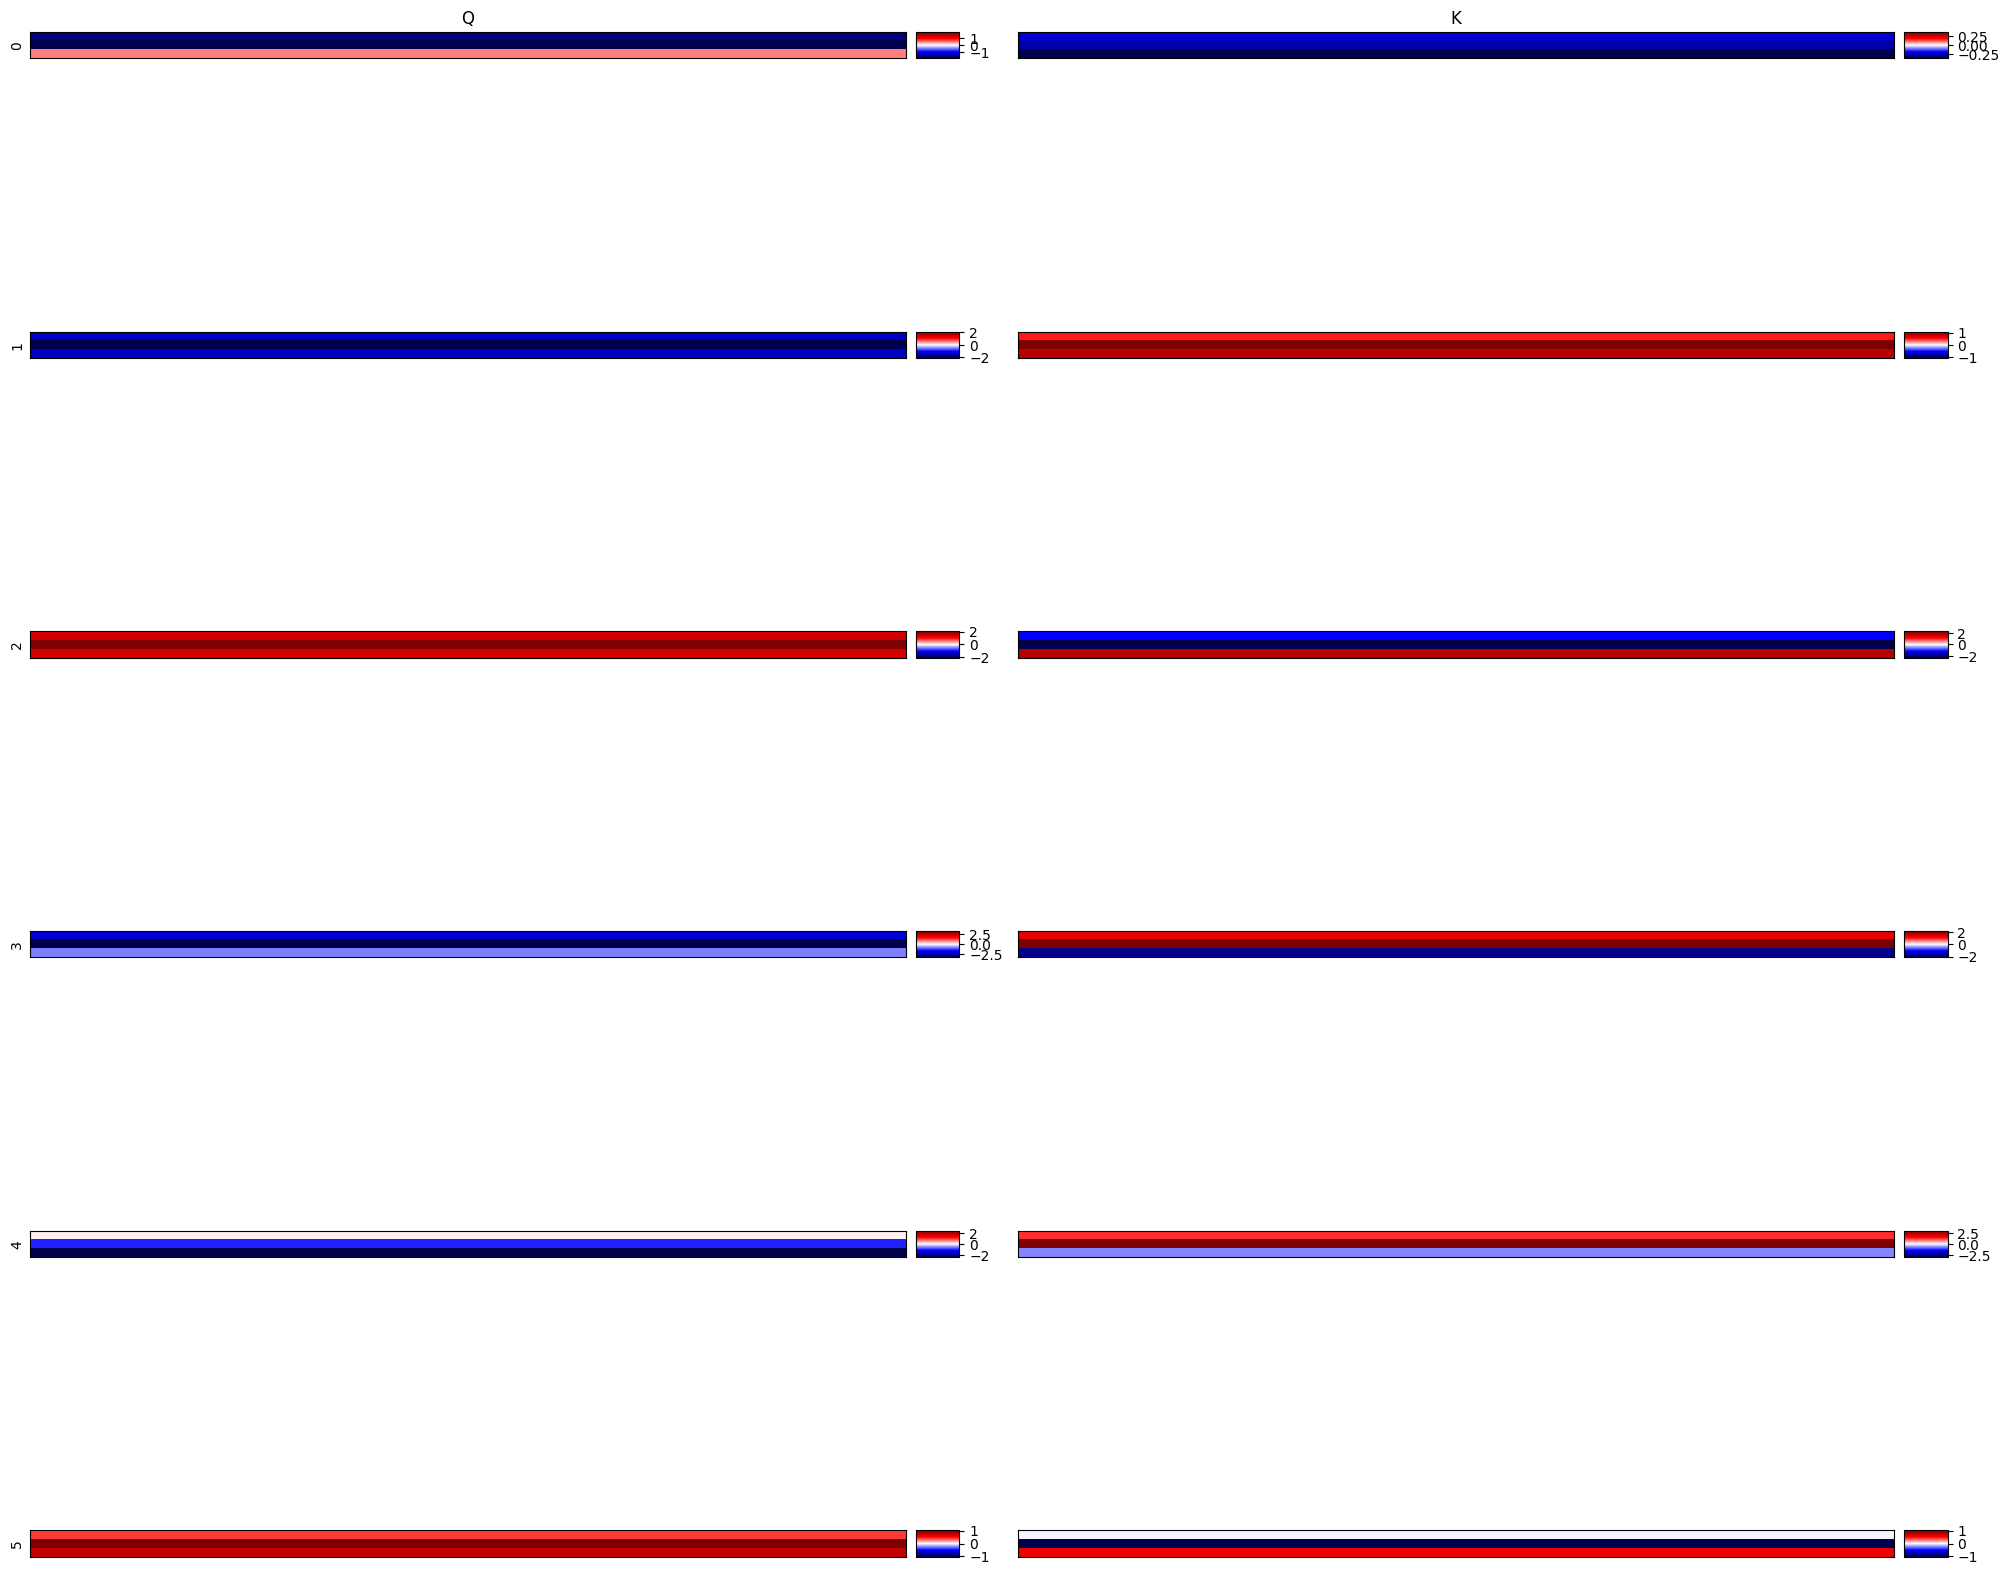

In [75]:
fig, ax = watcher.plot_alphabet_projection(
    q=True,
    k=True,
    v=False,
    # transpose=False,
    # reduce_dims={0: 0},
    # append_dims=(1, ),
    figsize=(20, 20),
)
# fig.savefig(
#     f"copying_values_{model_id}.pdf",
#     facecolor=(0, 0, 0, 0),
#     bbox_inches="tight",
# )

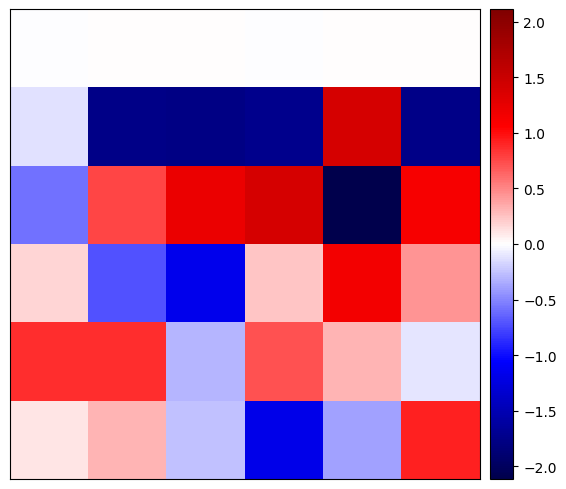

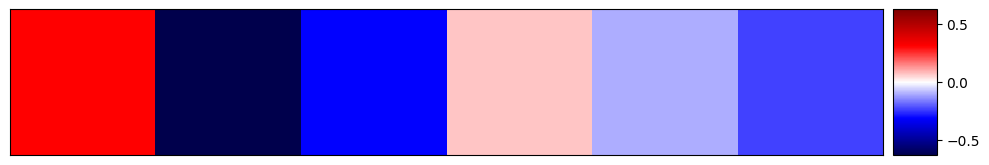

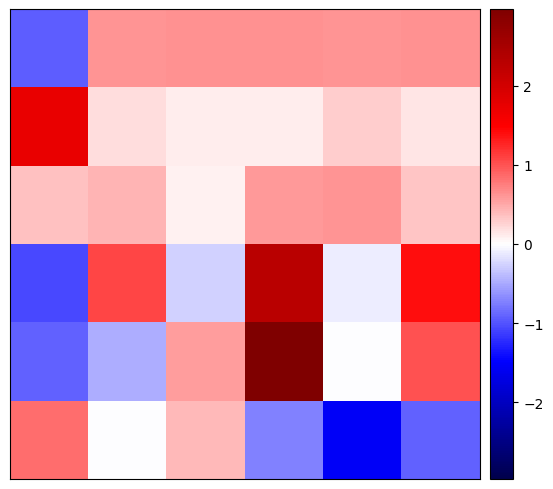

In [14]:
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.levels.0.weightings.0.P_Q.transform.weight",
    figsize=(10, 5),
)
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.levels.0.weightings.0.P_Q.transform.bias",
    figsize=(10, 5),
)
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.levels.0.weightings.0.P_K.transform.weight",
    # log_cmap=(0.1, 1.0),
    figsize=(10, 5),
)

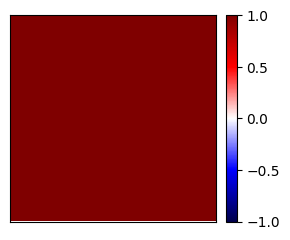

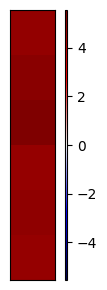

In [12]:
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.W_H",
    # reduce_dims={2: 0},
    # append_dims=(0,1,),
    figsize=(3, 3),
)
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.W_O",
    reduce_dims={2: 0},
    append_dims=(0,1,),
    figsize=(10, 3),
)

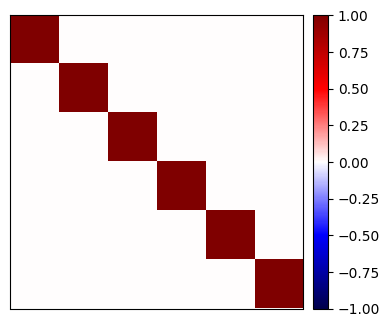

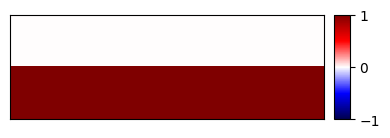

In [15]:
fig, ax = watcher.plot_parameter_matrix(
    "embedding.weight",
    figsize=(4, 4),
)
fig, ax = watcher.plot_parameter_matrix(
    "unembedding.weight",
    figsize=(4, 4),
)

## Example based

In [117]:
x, y = cyclic(
    1,
    length=1000,
    characters=6,
)
x, y, watcher.model(x)[0,-1]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 

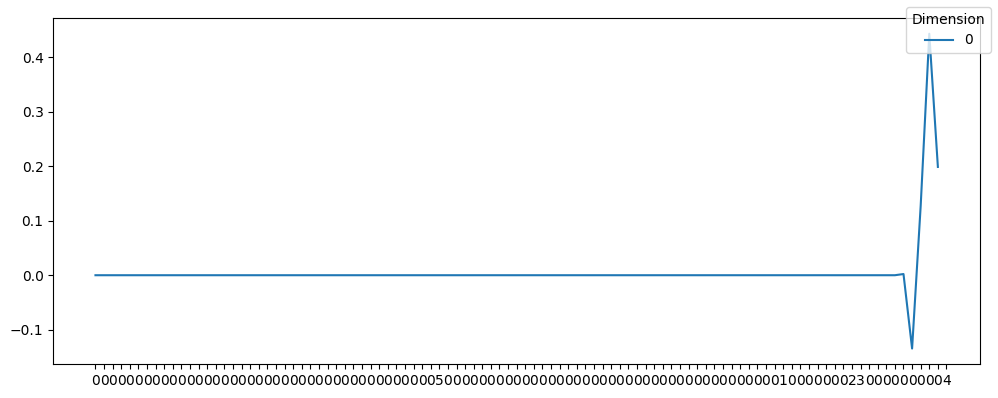

In [52]:
fig, ax = watcher.plot_iss_time(
    # x[0],
    torch.tensor(94*[0]+[1,2,3,4,5]),
    x_axis=x[0],#watcher.model(x).argmax(-1)[0, :],
    # reduce_dims={1: 0},
    # append_dims=(1, ),
    # index_selection=((-1, torch.arange(100)), ),
    project_heads=False,
    project_values=False,
    figsize=(10, 4),
)
# fig, ax = watcher.plot_iss(
#     x[0],
#     append_dims=(1, ),
#     project_heads=True,
#     project_values=False,
#     figsize=(20, 20),
# )

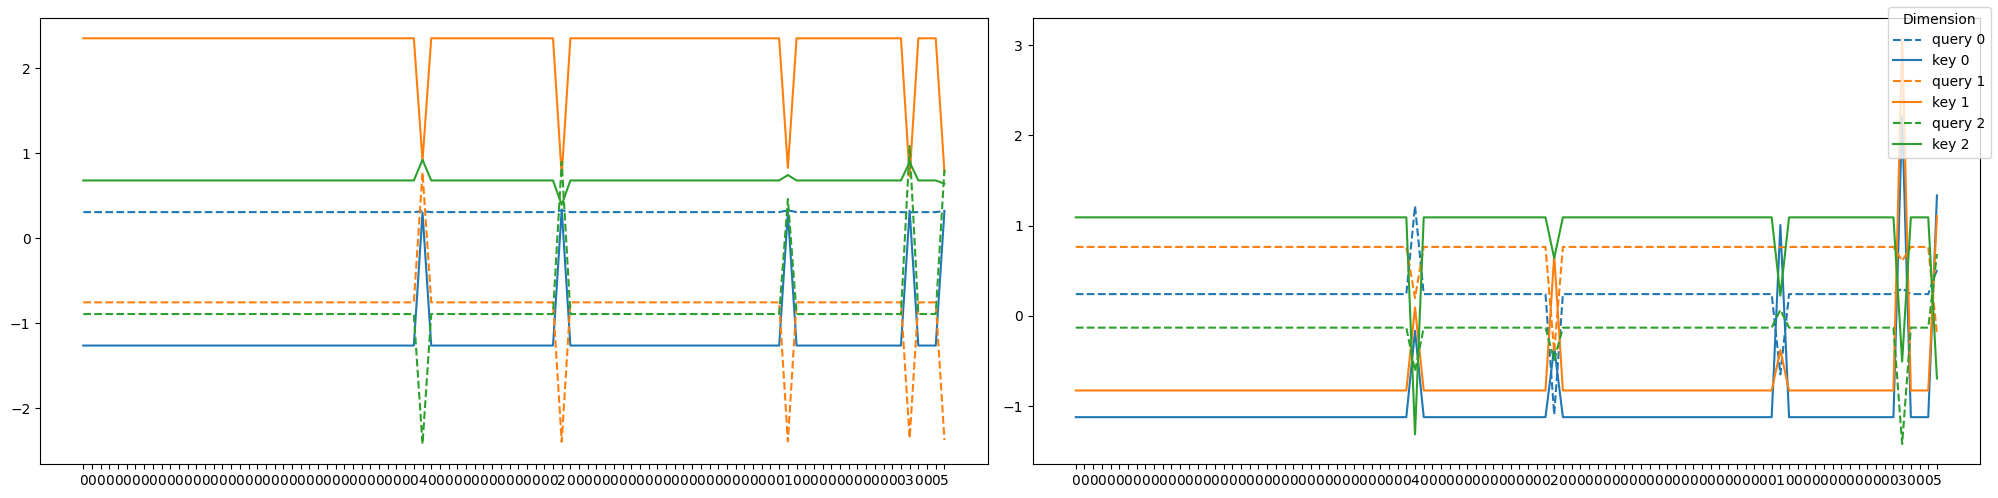

In [7]:
fig, ax = watcher.plot_query_key_time(
    x[0],
    x_axis=x[0],
    weighting=0,
    names=("query", "key"),
    cmap="tab10",
    # x_axis=x[0],
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    reduce_dims={0: 0},
    figsize=(20, 5),
)

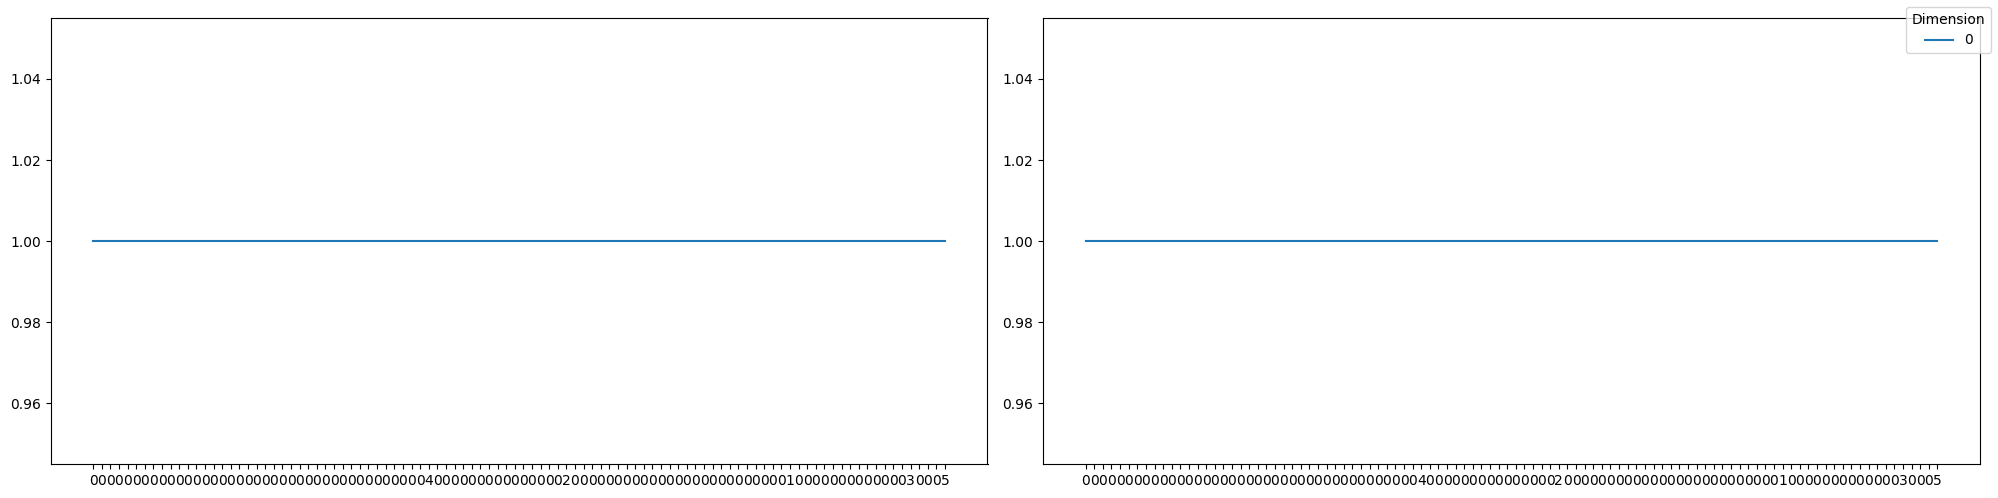

In [8]:
fig, ax = watcher.plot_values_time(
    x[0],
    x_axis=x[0],
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    reduce_dims={0: 0},
    figsize=(20, 5),
)

In [78]:
from sainomore.xai import get_attention_matrices, get_iss

att = get_attention_matrices(watcher.model, torch.arange(6), total=True)
print(att.shape)
print(att[0, -1, -1].sum())
iss = get_iss(watcher.model, torch.arange(6))
print(iss[0, :, -1])

torch.Size([1, 3, 6, 6])
tensor(0.2775)
tensor([0.2775])


In [88]:
torch.pi/2

1.5707963267948966

In [98]:
torch.cos(torch.tensor([torch.pi/2], dtype=torch.double))

tensor([6.1232e-17], dtype=torch.float64)

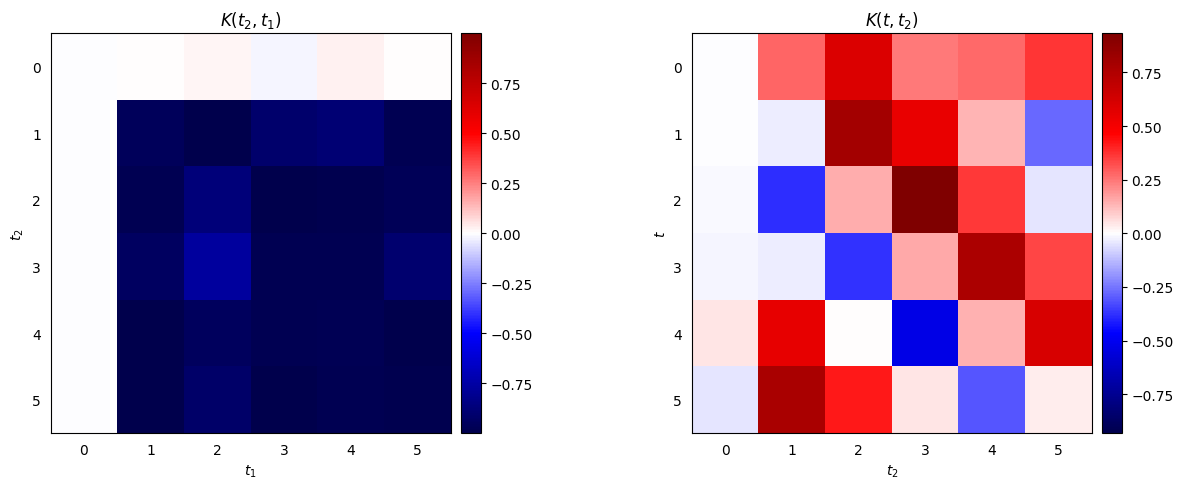

In [103]:
fig, ax = watcher.plot_attention_matrices(
    torch.arange(6),#.flip(0),#x[0],#
    xlabels=list(map(str, np.arange(6))),
    show_example=False,
    total=False,
    cmap="seismic",
    share_cmap=False,
    log_cmap=False,
    causal_mask=False,
    only_kernels=None,
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    center_zero=True,
    # index_selection=((-1, torch.arange(95, 100)), (-2, torch.arange(95, 100))),
    cmap_example="tab10",
    figsize=(13, 5),
)
fig.savefig(
    f"cyclic_attention_{model_id}.pdf",
    facecolor=(0, 0, 0, 0),
    bbox_inches="tight",
)